# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Prof01.csv')

In [22]:
df['sexo'] = df['sexo'].map({'M':0, 'F':1})

In [23]:
df.drop(columns=['Unnamed: 0','index','mau','data_ref'],inplace=True)


In [24]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,0,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,0,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,1,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,0,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [39]:
df.renda.describe()

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [29]:
df.corr()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
sexo,1.000000,-0.373288,0.044192,-0.126175,0.218183,0.146123,-0.159661,-0.180722
posse_de_veiculo,-0.373288,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414
posse_de_imovel,0.044192,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827
qtd_filhos,-0.126175,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,0.218183,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,0.146123,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,-0.159661,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,-0.180722,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

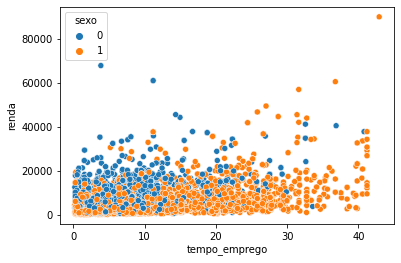

In [45]:
_ = sns.scatterplot(x='tempo_emprego', y='renda', hue='sexo', data = df)

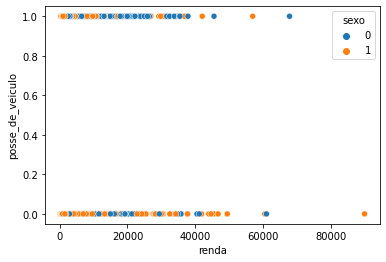

In [40]:
_ = sns.scatterplot(x='renda', y='posse_de_veiculo', hue='sexo', data = df)

3) Na sua opinião, há outliers na variável renda?

In [ ]:
Sim, há poucas pessoas com renda na faixa entre 60k e 80k

4) Calcule o logaritmo da variável renda e repita a sequência de análise

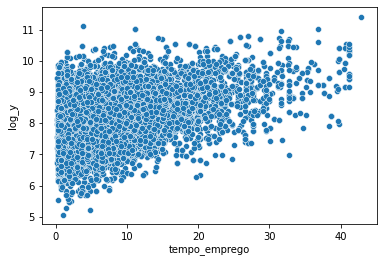

In [48]:
df_log = df.copy()
df_log['log_y'] = np.log(df_log['renda'])

_ = sns.scatterplot(x='tempo_emprego', y='log_y', data = df_log)

In [49]:
df_log.corr()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_y
sexo,1.000000,-0.373288,0.044192,-0.126175,0.218183,0.146123,-0.159661,-0.180722,-0.235867
posse_de_veiculo,-0.373288,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414,0.090529
posse_de_imovel,0.044192,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827,0.045297
qtd_filhos,-0.126175,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,0.218183,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,0.146123,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,-0.159661,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,-0.180722,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_y,-0.235867,0.090529,0.045297,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


In [54]:
mascara = np.triu(df_log.corr())

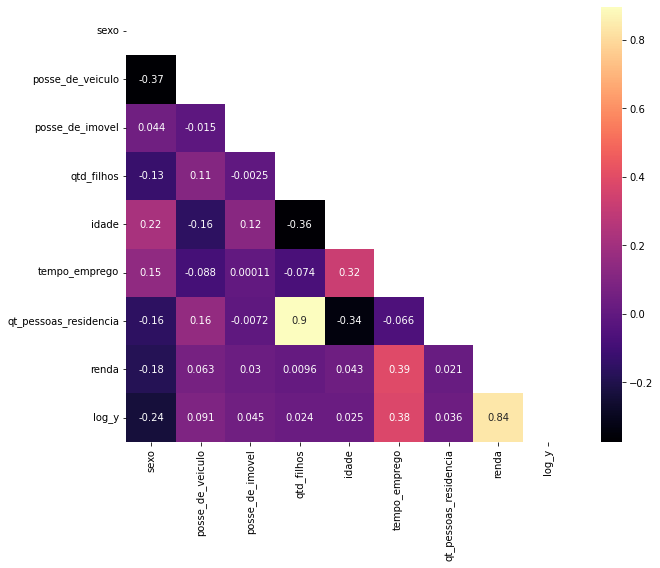

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(df_log.corr(), annot=True,cmap='magma',mask=mascara);

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
Visualmente na minha opinião piorou a análise.